- problem 67 cyberville families sampling


In [1]:
# 67 setup load families.csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

families = pd.read_csv('families.csv')
n_population = len(families)

population_mean_income = families['INCOME'].mean()
population_prop_female_head = (families['TYPE'] == 3).mean()
population_prop_no_hs = (families['EDUCATION'] <= 38).mean()

population_summary = pd.Series({
  'n_population': n_population,
  'population_mean_income': population_mean_income,
  'population_prop_female_head': population_prop_female_head,
  'population_prop_no_hs': population_prop_no_hs,
})
population_summary


n_population                   43886.000000
population_mean_income         41335.507041
population_prop_female_head        0.192066
population_prop_no_hs              0.211503
dtype: float64

- 67a simple random samples n 500
- estimates se fpc ci 95
- repeat 5 times


In [3]:
# 67a a. take a simple random sample of 500 families
def estimate_mean(sample_values, n_sample, n_population):
    sample_values = np.asarray(sample_values)
    estimate = sample_values.mean()
    f = n_sample / n_population
    sample_variance = sample_values.var(ddof=1)
    standard_error = np.sqrt((1 - f) * sample_variance / n_sample)
    ci_low, ci_high = estimate - 1.96 * standard_error, estimate + 1.96 * standard_error
    return estimate, standard_error, ci_low, ci_high

def estimate_prop(sample_indicator, n_sample, n_population):
    return estimate_mean(sample_indicator.astype(float), n_sample, n_population)

def sample_stats(sample_df):
    n_sample = len(sample_df)
    female_head = (sample_df['TYPE'] == 3).to_numpy()
    children = sample_df['CHILDREN'].to_numpy()
    no_hs = (sample_df['EDUCATION'] <= 38).to_numpy()
    income = sample_df['INCOME'].to_numpy()

    stats_rows = []
    for label, values, kind in [
        ('prop_female_head', female_head, 'prop'),
        ('mean_children', children, 'mean'),
        ('prop_no_hs_diploma', no_hs, 'prop'),
        ('mean_income', income, 'mean'),
    ]:
        if kind == 'prop':
            est, se, lo, hi = estimate_prop(values, n_sample, n_population)
        else:
            est, se, lo, hi = estimate_mean(values, n_sample, n_population)
        stats_rows.append({
            'parameter': label,
            'estimate': est,
            'se': se,
            'ci_low': lo,
            'ci_high': hi,
        })

    return pd.DataFrame(stats_rows)

results_a = []
for seed in [1, 2, 3, 4, 5]:
    sample = families.sample(n=500, replace=False, random_state=seed)
    sample_result = sample_stats(sample)
    sample_result.insert(0, 'sample_seed', seed)
    results_a.append(sample_result)

results_a = pd.concat(results_a, ignore_index=True)
results_a


,sample_seed,parameter,estimate,se,ci_low,ci_high
0,1,prop_female_head,0.178,0.017026,0.144629,0.211371
1,1,mean_children,0.962,0.049974,0.864051,1.059949
2,1,prop_no_hs_diploma,0.170,0.016720,0.137230,0.202770
3,1,mean_income,39355.664,1291.494499,36824.334781,41886.993219
4,2,prop_female_head,0.178,0.017026,0.144629,0.211371
5,2,mean_children,0.866,0.052213,0.763663,0.968337
6,2,prop_no_hs_diploma,0.202,0.017871,0.166974,0.237026
7,2,mean_income,40785.372,1305.233750,38227.113850,43343.630150
8,3,prop_female_head,0.200,0.017804,0.165104,0.234896
9,3,mean_children,0.942,0.051190,0.841668,1.042332


- 67b 100 samples n 400
- income means histogram normal overlay
- ecdf normal cdf overlay
- qq plot
- ci coverage
- repeat n 100 compare


mean_400 41011.2075
sd_400 1547.140777184773


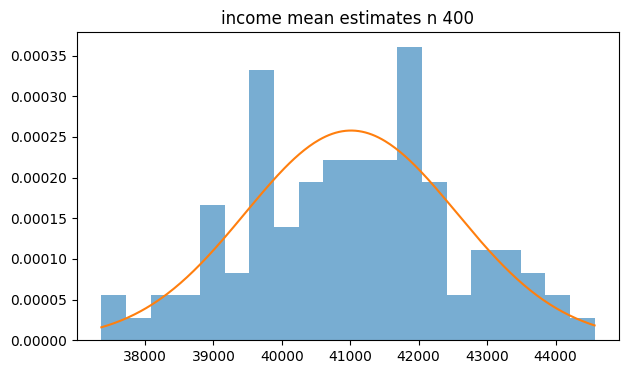

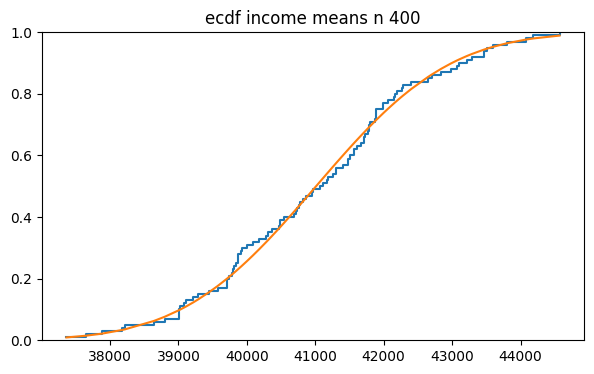

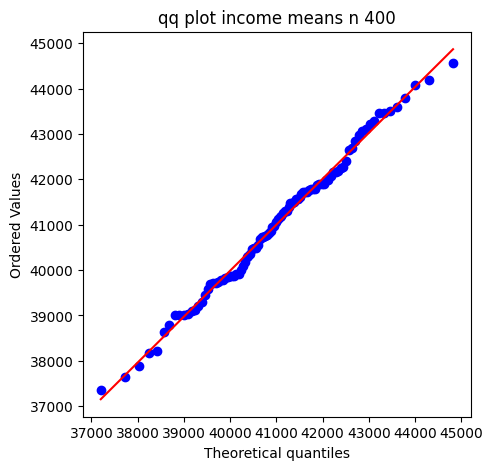

In [4]:
# 67b b. take 100 samples of size 400
def sample_mean_incomes(n_sample, seeds):
    means = []
    for seed in seeds:
        sample = families.sample(n=n_sample, replace=False, random_state=int(seed))
        means.append(sample['INCOME'].mean())
    return np.array(means)

income_means_400 = sample_mean_incomes(400, range(1, 101))
mean_400 = income_means_400.mean()
sd_400 = income_means_400.std(ddof=1)

print('mean_400', float(mean_400))
print('sd_400', float(sd_400))

plt.figure(figsize=(7, 4))
plt.hist(income_means_400, bins=20, density=True, alpha=0.6)
x = np.linspace(income_means_400.min(), income_means_400.max(), 300)
plt.plot(x, stats.norm.pdf(x, loc=mean_400, scale=sd_400))
plt.title('income mean estimates n 400')
plt.show()

sorted_means = np.sort(income_means_400)
ecdf_y = np.arange(1, len(sorted_means) + 1) / len(sorted_means)
plt.figure(figsize=(7, 4))
plt.step(sorted_means, ecdf_y, where='post')
plt.plot(sorted_means, stats.norm.cdf(sorted_means, loc=mean_400, scale=sd_400))
plt.title('ecdf income means n 400')
plt.ylim(0, 1)
plt.show()

plt.figure(figsize=(5, 5))
stats.probplot(income_means_400, dist=stats.norm, sparams=(mean_400, sd_400), plot=plt)
plt.title('qq plot income means n 400')
plt.show()


In [5]:
# 67b vi. for each of the 100 samples find a 95% confidence interval for the population average income
def ci_contains_population_mean(n_sample, seeds, population_mean):
    contains = []
    for seed in seeds:
        sample = families.sample(n=n_sample, replace=False, random_state=int(seed))
        est, se, lo, hi = estimate_mean(sample['INCOME'].to_numpy(), n_sample, n_population)
        contains.append(lo <= population_mean <= hi)
    return np.array(contains)

contains_400 = ci_contains_population_mean(400, range(1, 101), population_mean_income)
print('ci_coverage_400', int(contains_400.sum()))


ci_coverage_400 95


mean_100 41341.59
sd_100 3100.8691253432594


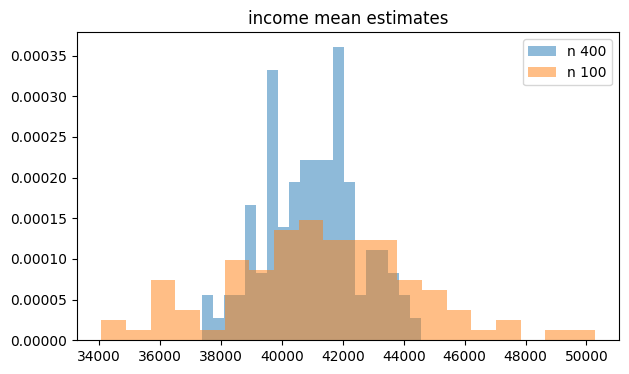

In [6]:
# 67b vii. take 100 samples of size 100 compare
income_means_100 = sample_mean_incomes(100, range(1001, 1101))
mean_100 = income_means_100.mean()
sd_100 = income_means_100.std(ddof=1)

print('mean_100', float(mean_100))
print('sd_100', float(sd_100))

plt.figure(figsize=(7, 4))
plt.hist(income_means_400, bins=20, density=True, alpha=0.5, label='n 400')
plt.hist(income_means_100, bins=20, density=True, alpha=0.5, label='n 100')
plt.title('income mean estimates')
plt.legend()
plt.show()


- 67c sample n 500 compare income by family type


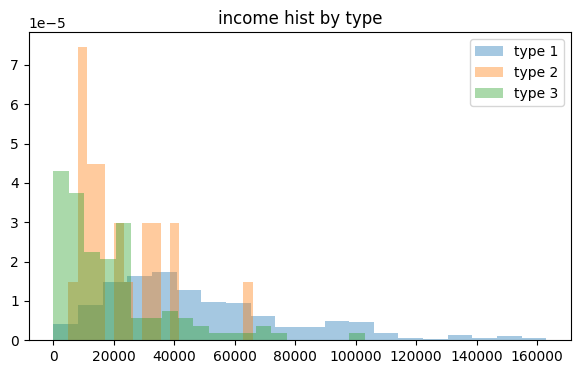

<Figure size 700x400 with 0 Axes>

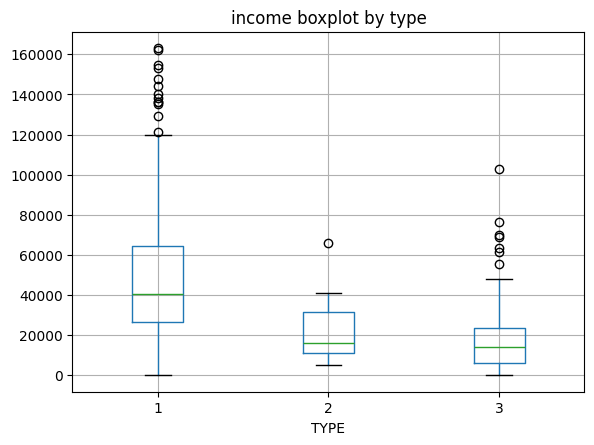

In [7]:
# 67c c. compare the incomes of the three family types
sample_c = families.sample(n=500, replace=False, random_state=123)
plt.figure(figsize=(7, 4))
for family_type in [1, 2, 3]:
    incomes = sample_c.loc[sample_c['TYPE'] == family_type, 'INCOME']
    plt.hist(incomes, bins=20, alpha=0.4, density=True, label=f'type {family_type}')
plt.title('income hist by type')
plt.legend()
plt.show()

plt.figure(figsize=(7, 4))
sample_c.boxplot(column='INCOME', by='TYPE')
plt.title('income boxplot by type')
plt.suptitle('')
plt.show()


- 67d sample n 400 per region compare


<Figure size 700x400 with 0 Axes>

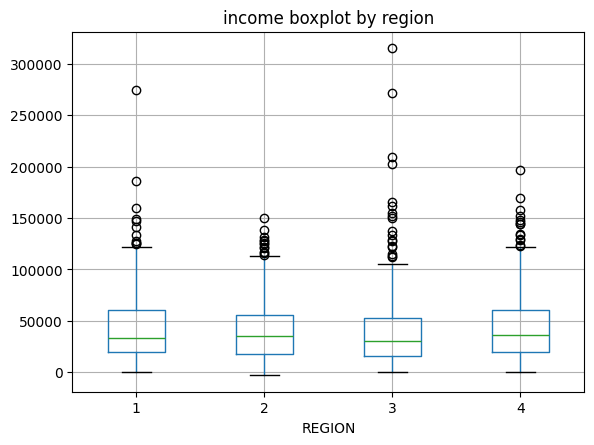

<Figure size 700x400 with 0 Axes>

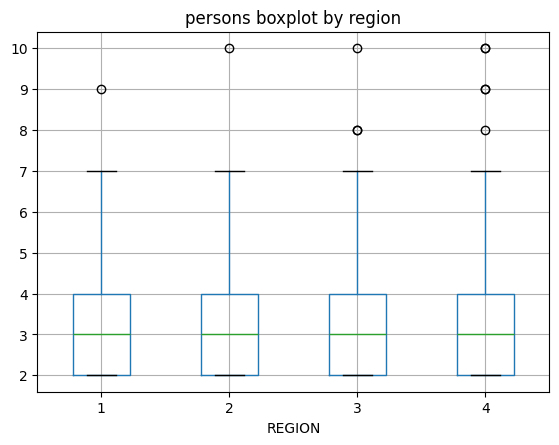

<Figure size 700x400 with 0 Axes>

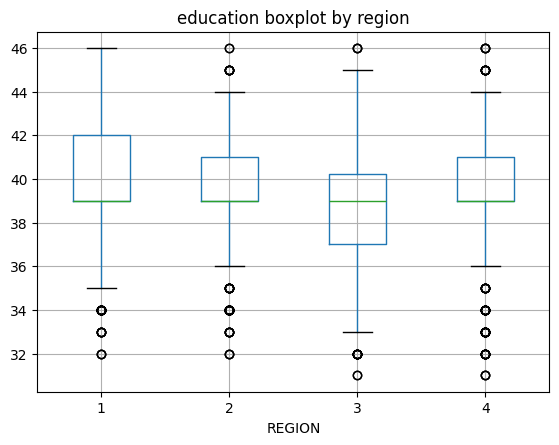

In [8]:
# 67d d. take simple random samples of size 400 from each of the four regions
samples_by_region = []
for region in [1, 2, 3, 4]:
    region_df = families.loc[families['REGION'] == region]
    sample_region = region_df.sample(n=400, replace=False, random_state=200 + region)
    samples_by_region.append(sample_region)

sample_d = pd.concat(samples_by_region, ignore_index=True)

plt.figure(figsize=(7, 4))
sample_d.boxplot(column='INCOME', by='REGION')
plt.title('income boxplot by region')
plt.suptitle('')
plt.show()

plt.figure(figsize=(7, 4))
sample_d.boxplot(column='PERSONS', by='REGION')
plt.title('persons boxplot by region')
plt.suptitle('')
plt.show()

plt.figure(figsize=(7, 4))
sample_d.boxplot(column='EDUCATION', by='REGION')
plt.title('education boxplot by region')
plt.suptitle('')
plt.show()
